In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 3  # Number of disease classes: corny bacterial, early blight, blindy

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load the dataset
dataset_path = 'C:/Users/TALHA/Downloads/Dataset'

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Use training subset of the dataset
)

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Use validation subset of the dataset
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)

# Save the trained model
model.save('plant_disease_detection_model.h5')


Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


C:\Users\TALHA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Users\TALHA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 828ms/step - accuracy: 0.4809 - loss: 1.0833 - val_accuracy: 0.8667 - val_loss: 0.3532
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 451ms/step - accuracy: 0.8645 - loss: 0.2988 - val_accuracy: 0.9222 - val_loss: 0.2136
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 466ms/step - accuracy: 0.9525 - loss: 0.1794 - val_accuracy: 0.9389 - val_loss: 0.1704
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - accuracy: 0.9654 - loss: 0.1304 - val_accuracy: 0.9722 - val_loss: 0.1191
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.9476 - loss: 0.1530 - val_accuracy: 0.9389 - val_loss: 0.2301
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 453ms/step - accuracy: 0.9643 - loss: 0.1518 - val_accuracy: 0.9944 - val_loss: 0.0529
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 460ms/step - accuracy: 0.9823 - loss: 0.0754 - val_accuracy: 0.9444 - val_loss: 0.1719
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 458ms/step - accuracy: 0.9705 - loss: 0.0709 - val_accuracy: 0.983

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('plant_disease_detection_model.h5')

# Define a function to make predictions on new images
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        return "Corny Bacterial"
    elif predicted_class == 1:
        return "Early Blight"
    elif predicted_class == 2:
        return "Blindy"

# Path to the image you want to predict
image_path = '9.jpg'

# Make prediction
prediction = predict_disease(image_path)
print("Predicted Disease:", prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted Disease: Corny Bacterial


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


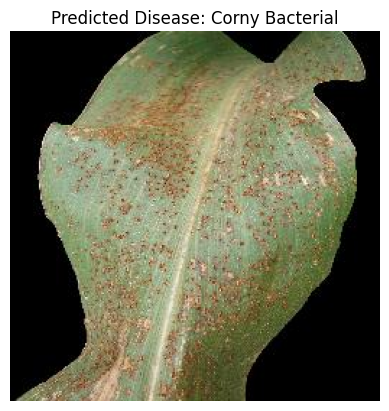

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('plant_disease_detection_model.h5')

# Explicitly compile the model to suppress the warning
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a function to make predictions on new images
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        return "Corny Bacterial"
    elif predicted_class == 1:
        return "Early Blight"
    elif predicted_class == 2:
        return "Blindy"

# Path to the image you want to predict
image_path = '9.jpg'

# Load the image using OpenCV for display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB

# Make prediction
prediction = predict_disease(image_path)

# Display the image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Disease: {prediction}')
plt.show()
